# Feature Selection Pearson Correlation Coefficien on PUBG Dataset

## Import Library

In [1]:
import math
import cmath
import sys
import traceback
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
from scipy import stats
from scipy.stats import t
from sklearn import model_selection

In [2]:
#Read Dataset
data = pd.read_csv("D:\PROPOSAL SKRIPSI\DATASET\pubg-final.csv")

df = pd.DataFrame(data)

df.drop('Results', axis = 1, inplace=True)
df.style

,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
0,7.620000,49,30,400,715,0.080000,4,2,612.000000,47.000000,34.300000,29.400000,22.000000,115.100000,80.600000,69.000000,51.800000
1,7.620000,49,30,400,710,0.010000,4,2,490.000000,47.000000,34.300000,29.400000,22.000000,115.100000,80.600000,69.000000,51.800000
2,7.620000,47,30,400,715,0.086000,4,2,547.000000,46.000000,32.900000,28.200000,21.100000,110.400000,77.300000,66.200000,49.700000
3,7.620000,49,30,500,715,0.010000,4,2,490.000000,49.000000,34.300000,29.400000,22.000000,115.100000,80.600000,69.000000,51.800000
4,5.560000,43,30,600,880,0.086000,4,2,502.000000,41.000000,30.100000,25.800000,19.300000,101.000000,70.700000,60.600000,45.400000
5,5.560000,43,30,600,880,0.096000,4,2,448.000000,41.000000,30.100000,25.800000,19.300000,101.000000,70.700000,60.600000,45.400000
6,5.560000,43,30,600,890,0.086000,4,2,502.000000,41.000000,30.100000,25.800000,19.300000,101.000000,70.700000,60.600000,45.400000
7,5.560000,43,30,600,900,0.010000,4,2,430.000000,43.000000,30.100000,25.800000,19.300000,101.000000,70.700000,60.600000,45.400000
8,5.560000,43,30,600,880,0.086000,4,2,502.000000,41.000000,30.100000,25.800000,19.300000,101.000000,70.700000,60.600000,45.400000
9,5.560000,43,30,600,880,0.096000,4,2,466.000000,41.000000,30.100000,25.800000,19.300000,101.000000,70.700000,60.600000,45.400000


# Mendefinisikan Konstruktor  dan Fungsi untuk Algoritma Perhitungan

In [3]:
class CorrelationCoefficient:
    r = []
    t = []
    pval = []
    n = len(df)
    threshold = 0.05
    
    def compute_r(self, x, y):
        """ R computation
        :param  list  x: 1st list of random variables
        :param  list  y: 2nd list of random variables
        :return float r: correlation coefficient of X and Y
        """
        if type(x) != list:
            print("Argument(X) is not a list!")
            sys.exit()
        if type(y) != list:
            print("Argument(Y) is not a list!")
            sys.exit()
        if len(x) == 0:
            print("List(X) is none!")
            sys.exit()
        if len(y) == 0:
            print("List(Y) is none!")
            sys.exit()
        if len(x) != len(y):
            print("Argument list size is invalid!")
            sys.exit()
        try:
            mean_x, mean_y  = sum(x) / len(x), sum(y) / len(y)
            cov   = sum([(a - mean_x) * (b - mean_y) for a, b in zip(x, y)])
            var_x = sum([(a - mean_x) ** 2 for a in x])
            var_y = sum([(b - mean_y) ** 2 for b in y])
          
            return (cov / math.sqrt(var_x)) / math.sqrt(var_y)
        except Exception as e:
            raise
            
    def compute_t(self, n, r_coeff):
        try:
            if r_coeff < 1 :
                t = r_coeff * (cmath.sqrt(n - 2)/ cmath.sqrt(1 - r_coeff ** 2))
            else:
                t = 0
            return t
        except Exception as e:
            raise
            
    def r_df_after_compute(self, np_array_r, index_name, col_name):
        try:
            df = pd.DataFrame(np_array_r, index=index_name, columns=col_name)
            
            return df
        except Exception as e:
            raise 
            
    def t_df_after_compute(self, np_array_t, index_name, col_name):
        try:
            df = pd.DataFrame(np_array_t, index=index_name, columns=col_name, dtype="float")
            return df
        except Exception as e:
            raise 
            
    def pval_df_after_compute(self, np_array_pval, index_name, col_name):
        try:
            df = pd.DataFrame(np_array_pval, index=index_name, columns=col_name)
            return df
        except Exception as e:
            raise 
            
    def drop_features(self, dataset, threshold):
        try:
            col_corr = set()
            corr_matrix = dataset
            for i in range(len(df.columns)):
                for j in range (len(df.columns)) :
                      if corr_matrix.iloc[i, j] > threshold and corr_matrix.iloc[i, j] != 1 and corr_matrix.columns[j] not in col_corr : #THRESHOLD CHECK
                          colname = corr_matrix.columns[i]  #NAMA DARI FITUR/ KOLOM
                          col_corr.add(colname)
        
            return col_corr
        except Exception as e:
            raise 
            

# Mendefinisikan Konstruktor  dan Fungsi untuk Klasifikasi

In [16]:
class classifier :
    validation_size = 0.60
    seed = 7
            
    def model(self, drop_features):
        try:
            new_df = pd.DataFrame(data)
            new_df.drop(drop_features, axis=1, inplace=True)
         
           
            
            X = new_df.values[:,:-1]
            Y = new_df.values[:,-1:]
            
      
            np.random.seed(classifier.seed)
            
            X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=classifier.validation_size, random_state=classifier.seed)
            
        
            #return (X_train, X_test, Y_train, Y_test)
            return new_df
        except Exception as e:
            raise 
            
            
    def KNN(self, X_train, X_test, Y_train, Y_test):
        try:
            from sklearn.neighbors import KNeighborsClassifier
            model_KNN = KNeighborsClassifier(n_neighbors = 5, weights = 'distance', p = 3)
            
            
            
            model_KNN.fit(X_train,Y_train.ravel())
            Y_pred = model_KNN.predict(X_test)
            
            print('1) Confusion Matrix for KNN Model:')
            confusion_mat = pd.crosstab(Y_test.flatten(), Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
            from IPython.display import display
            display(confusion_mat)
            
            from sklearn.metrics import classification_report
            cr = classification_report(Y_test, Y_pred, labels=None, target_names=None, sample_weight=None, digits=2)
            print('2) Classification report:\n',cr)
            
            accuracy_train = model_KNN.score(X_train,Y_train)
            accuracy_test = model_KNN.score(X_test,Y_test)
            print('3) Accuracy on train and test datasets:', "%.4f and %.4f" % (accuracy_train, accuracy_test))
           
            
            return (accuracy_train, accuracy_test)
        
        
        
            
        except Exception as e:
            raise 
            
            
    def DecisionTree(self, X_train, X_test, Y_train, Y_test):
        try:
            from sklearn.tree import DecisionTreeClassifier
            model_DT = DecisionTreeClassifier(min_samples_leaf = 3, random_state = classifier.seed)
           
           
            model_DT.fit(X_train,Y_train)
            Y_pred = model_DT.predict(X_test)
            
            print('1) Confusion Matrix for SVC Model:')
            confusion_mat = pd.crosstab(Y_test.flatten(), Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
            from IPython.display import display
            display(confusion_mat)
            
            from sklearn.metrics import classification_report
            cr = classification_report(Y_test.flatten(), Y_pred, labels=None, target_names=None, sample_weight=None, digits=2)
            print('2) Classification report:\n',cr)
            
            accuracy_train = model_DT.score(X_train,Y_train)
            accuracy_test = model_DT.score(X_test,Y_test)
            print('3) Accuracy on train and test datasets:', "%.4f and %.4f" % (accuracy_train, accuracy_test))
           
            return (accuracy_train, accuracy_test)
       
        
        except Exception as e:
            raise 
            
            
    def SupportVectorMachine(self, X_train, X_test, Y_train, Y_test):
        try:
            from sklearn import svm
            model_SVC = svm.SVC(gamma = 'auto')
            
            
            model_SVC.fit(X_train,Y_train.ravel())
            Y_pred = model_SVC.predict(X_test)
            
            print('1) Confusion Matrix for SVC Model:')
            confusion_mat = pd.crosstab(Y_test.flatten(), Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
            from IPython.display import display
            display(confusion_mat)
            
            from sklearn.metrics import classification_report
            cr = classification_report(Y_test, Y_pred, labels=None, target_names=None, sample_weight=None, digits=2)
            print('2) Classification report:\n',cr)
            
            accuracy_train = model_SVC.score(X_train,Y_train)
            accuracy_test = model_SVC.score(X_test,Y_test)
            print('3) Accuracy on train and test datasets:', "%.4f and %.4f" % (accuracy_train, accuracy_test))
            
            return (accuracy_train, accuracy_test)
        
        
        except Exception as e:
            raise 
            
            
    def NaiveBayes(self, X_train, X_test, Y_train, Y_test):
        try:
            from sklearn.naive_bayes import GaussianNB
            model_NB = GaussianNB()
            
            
            model_NB.fit(X_train,Y_train.ravel())
            Y_pred = model_NB.predict(X_test)
            
            print('1) Confusion Matrix for SVC Model:')
            confusion_mat = pd.crosstab(Y_test.flatten(), Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
            from IPython.display import display
            display(confusion_mat)
            
            from sklearn.metrics import classification_report
            cr = classification_report(Y_test, Y_pred, labels=None, target_names=None, sample_weight=None, digits=2)
            print('2) Classification report:\n',cr)
            
            accuracy_train = model_NB.score(X_train,Y_train)
            accuracy_test = model_NB.score(X_test,Y_test)
            print('3) Accuracy on train and test datasets:', "%.4f and %.4f" % (accuracy_train, accuracy_test))
        
            return (accuracy_train, accuracy_test)
        
        
        except Exception as e:
            raise 

# Main Program

In [5]:
if __name__ == '__main__':
    try:
        for i in range(len(df.columns)):
            x = df.iloc[:, i].tolist()
            col_r = []
            col_t = []
            col_pval = []
            for j in range (len(df.columns)):
                y = df.iloc[:, j].tolist()
                obj = CorrelationCoefficient()
                
                # PERHITUNGAN R, T-TEST, P-VALUE
                r_coeff = obj.compute_r(x, y)
                t_test = obj.compute_t(obj.n, r_coeff)
                p_val = t.sf(np.abs(t_test), obj.n-1)*2 
               
                
                # MEMASUKKAN PERHITUNGAN KEDALAM LIST
                col_r.append(obj.compute_r(x, y))
                col_t.append(t_test)
                col_pval.append(p_val)
                
            obj.r.append(col_r)
            obj.t.append(col_t)
            obj.pval.append(col_pval)
    except Exception as e:
        traceback.print_exc()
        sys.exit(1)

# MENGUBAH LIST MENJADI NUMPY ARRAY

In [6]:
np_array_r = np.array(obj.r)
np_array_ttest = np.array(obj.t)
np_array_pval = np.array(obj.pval)

# MENGUBAH NUMPY ARRAY MENJADI DATAFRAME

In [7]:

r_df = obj.r_df_after_compute(np_array_r, df.columns, df.columns)
t_df = obj.t_df_after_compute(np_array_ttest, df.columns, df.columns)
pval_df = obj.pval_df_after_compute(np_array_pval, df.columns, df.columns)


                       Bullet Type        Damage  Magazine Capacity  \
Bullet Type               0.000000  3.135004e-02           0.328943   
Damage                    0.031350  0.000000e+00           0.012697   
Magazine Capacity         0.328943  1.269673e-02           1.000000   
Range                     0.649778  1.733301e-01           0.141590   
Bullet Speed              0.090158  2.753799e-01           0.003033   
Rate of Fire              0.026739  4.863216e-02           0.010343   
Shots to Kill (Chest)     0.528158  1.583793e-07           0.084451   
Shots to Kill (Head)      0.745500  2.607162e-07           0.112948   
Damage Per Second         0.000007  1.472636e-01           0.014102   
BDMG_0                    0.000357  2.312069e-14           0.186669   
BDMG_1                    0.000343  2.671537e-14           0.193977   
BDMG_2                    0.000343  2.891323e-14           0.195721   
BDMG_3                    0.000345  2.716089e-14           0.194070   
HDMG_0

D:\Anaconda\lib\site-packages\pandas\core\internals\construction.py:195: ComplexWarning: Casting complex values to real discards the imaginary part
  values = values.astype(dtype)


<AxesSubplot:>

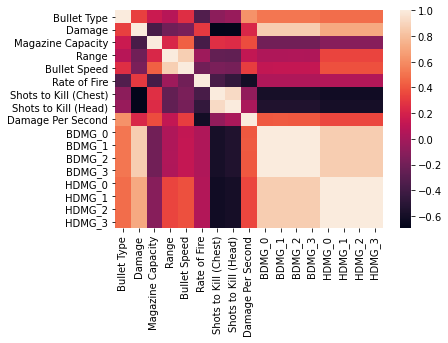

In [8]:
sns.heatmap(r_df, xticklabels=True, yticklabels=True)

<AxesSubplot:>

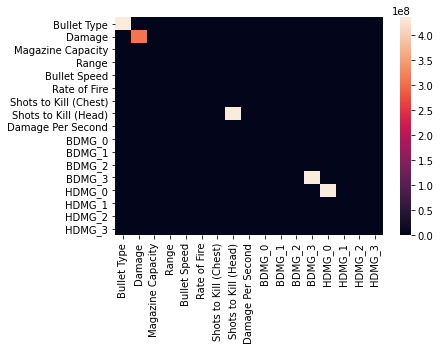

In [9]:
sns.heatmap(t_df, xticklabels=True, yticklabels=True)

<AxesSubplot:>

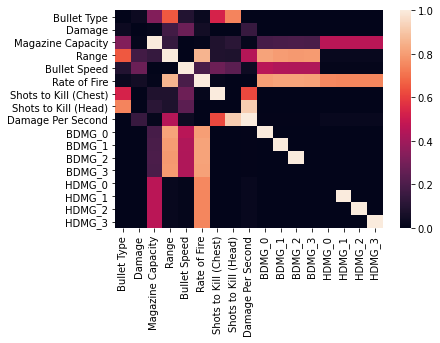

In [10]:
sns.heatmap(pval_df, xticklabels=True, yticklabels=True)

# Drop Fitur

In [17]:
objClassifier = classifier()
drop_features = obj.drop_features(obj.pval_df_after_compute(np_array_pval, df.columns, df.columns), obj.threshold)
print(drop_features)
print(len(drop_features))
model = objClassifier.model(drop_features)
print(model.columns)
model.head().style

{'Bullet Speed', 'Bullet Type', 'Shots to Kill (Head)', 'Magazine Capacity', 'Rate of Fire', 'Shots to Kill (Chest)', 'Range', 'Damage'}
8
Index(['Damage Per Second', 'BDMG_0', 'BDMG_1', 'BDMG_2', 'BDMG_3', 'HDMG_0',
       'HDMG_1', 'HDMG_2', 'HDMG_3', 'Results'],
      dtype='object')


,Damage Per Second,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3,Results
0,612.000000,47.000000,34.300000,29.400000,22.000000,115.100000,80.600000,69.000000,51.800000,Assault Rifle
1,490.000000,47.000000,34.300000,29.400000,22.000000,115.100000,80.600000,69.000000,51.800000,Assault Rifle
2,547.000000,46.000000,32.900000,28.200000,21.100000,110.400000,77.300000,66.200000,49.700000,Assault Rifle
3,490.000000,49.000000,34.300000,29.400000,22.000000,115.100000,80.600000,69.000000,51.800000,Assault Rifle
4,502.000000,41.000000,30.100000,25.800000,19.300000,101.000000,70.700000,60.600000,45.400000,Assault Rifle


# Hasil Klasifikasi Untuk Setiap Classifier

## KNN

In [12]:
KNN = objClassifier.KNN(model[0], model[1], model[2], model[3])

1) Confusion Matrix for KNN Model:


Predicted,Assault Rifle,Designed Marksman Rifle,Melee,Pistol,Sniper Rifle,Submachine Gun,All
Actual,,,,,,,
Assault Rifle,3,2,0,0,0,0,5
Designed Marksman Rifle,3,0,0,0,0,0,3
Light Machine Gun,1,1,0,0,0,0,2
Melee,0,0,2,0,0,0,2
Other,0,0,1,0,0,0,1
Pistol,0,0,1,1,0,3,5
Shotgun,2,0,0,0,0,0,2
Sniper Rifle,0,0,1,0,2,0,3
Submachine Gun,3,0,0,0,0,1,4


2) Classification report:
                          precision    recall  f1-score   support

          Assault Rifle       0.25      0.60      0.35         5
Designed Marksman Rifle       0.00      0.00      0.00         3
      Light Machine Gun       0.00      0.00      0.00         2
                  Melee       0.40      1.00      0.57         2
                  Other       0.00      0.00      0.00         1
                 Pistol       1.00      0.20      0.33         5
                Shotgun       0.00      0.00      0.00         2
           Sniper Rifle       1.00      0.67      0.80         3
         Submachine Gun       0.25      0.25      0.25         4

               accuracy                           0.33        27
              macro avg       0.32      0.30      0.26        27
           weighted avg       0.41      0.33      0.30        27

3) Accuracy on train and test datasets: 1.0000 and 0.3333


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree 

In [13]:
DT = objClassifier.DecisionTree(model[0], model[1], model[2], model[3])

1) Confusion Matrix for SVC Model:


Predicted,Assault Rifle,Designed Marksman Rifle,Melee,Pistol,Submachine Gun,All
Actual,,,,,,
Assault Rifle,2,3,0,0,0,5
Designed Marksman Rifle,0,3,0,0,0,3
Light Machine Gun,0,2,0,0,0,2
Melee,0,0,2,0,0,2
Other,0,0,1,0,0,1
Pistol,0,2,1,0,2,5
Shotgun,0,0,0,2,0,2
Sniper Rifle,0,0,0,3,0,3
Submachine Gun,0,0,0,0,4,4


2) Classification report:
                          precision    recall  f1-score   support

          Assault Rifle       1.00      0.40      0.57         5
Designed Marksman Rifle       0.30      1.00      0.46         3
      Light Machine Gun       0.00      0.00      0.00         2
                  Melee       0.50      1.00      0.67         2
                  Other       0.00      0.00      0.00         1
                 Pistol       0.00      0.00      0.00         5
                Shotgun       0.00      0.00      0.00         2
           Sniper Rifle       0.00      0.00      0.00         3
         Submachine Gun       0.67      1.00      0.80         4

               accuracy                           0.41        27
              macro avg       0.27      0.38      0.28        27
           weighted avg       0.35      0.41      0.33        27

3) Accuracy on train and test datasets: 0.7059 and 0.4074


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Support Vector Machine 

In [14]:
SVM = objClassifier.SupportVectorMachine(model[0], model[1], model[2], model[3])

1) Confusion Matrix for SVC Model:


Predicted,Assault Rifle,Designed Marksman Rifle,Melee,All
Actual,,,,
Assault Rifle,4,1,0,5
Designed Marksman Rifle,3,0,0,3
Light Machine Gun,1,1,0,2
Melee,0,0,2,2
Other,1,0,0,1
Pistol,5,0,0,5
Shotgun,2,0,0,2
Sniper Rifle,3,0,0,3
Submachine Gun,4,0,0,4


2) Classification report:
                          precision    recall  f1-score   support

          Assault Rifle       0.17      0.80      0.29         5
Designed Marksman Rifle       0.00      0.00      0.00         3
      Light Machine Gun       0.00      0.00      0.00         2
                  Melee       1.00      1.00      1.00         2
                  Other       0.00      0.00      0.00         1
                 Pistol       0.00      0.00      0.00         5
                Shotgun       0.00      0.00      0.00         2
           Sniper Rifle       0.00      0.00      0.00         3
         Submachine Gun       0.00      0.00      0.00         4

               accuracy                           0.22        27
              macro avg       0.13      0.20      0.14        27
           weighted avg       0.11      0.22      0.13        27

3) Accuracy on train and test datasets: 1.0000 and 0.2222


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Naive Bayes

In [15]:
NB = objClassifier.NaiveBayes(model[0], model[1], model[2], model[3])

1) Confusion Matrix for SVC Model:


Predicted,Assault Rifle,Designed Marksman Rifle,Melee,Pistol,Submachine Gun,All
Actual,,,,,,
Assault Rifle,3,2,0,0,0,5
Designed Marksman Rifle,0,1,0,2,0,3
Light Machine Gun,1,1,0,0,0,2
Melee,0,0,2,0,0,2
Other,0,0,1,0,0,1
Pistol,0,0,1,3,1,5
Shotgun,0,0,0,2,0,2
Sniper Rifle,0,0,0,3,0,3
Submachine Gun,0,0,0,2,2,4


2) Classification report:
                          precision    recall  f1-score   support

          Assault Rifle       0.75      0.60      0.67         5
Designed Marksman Rifle       0.25      0.33      0.29         3
      Light Machine Gun       0.00      0.00      0.00         2
                  Melee       0.50      1.00      0.67         2
                  Other       0.00      0.00      0.00         1
                 Pistol       0.25      0.60      0.35         5
                Shotgun       0.00      0.00      0.00         2
           Sniper Rifle       0.00      0.00      0.00         3
         Submachine Gun       0.67      0.50      0.57         4

               accuracy                           0.41        27
              macro avg       0.27      0.34      0.28        27
           weighted avg       0.35      0.41      0.35        27

3) Accuracy on train and test datasets: 0.8235 and 0.4074


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
